In [1]:
#TASK1
#DATA CLEANING AND PREPARATION
import pandas as pd
import numpy as np
df=pd.read_csv("Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [7]:
# 2. Handle Missing Values
print(df.isnull().sum())
# Drop rows with any missing values
df_cleaned = df.dropna()
#All missing values have been handled by dropping rows, resulting in a cleaned dataset

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [8]:
# 3. Correct Data Types
# Convert all columns to numeric, coercing errors to NaN
# This will turn values like 'nan' into proper missing values
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
df = df.dropna()

# Check the data types 
print(df.dtypes)
#All columns were converted to numeric data types, and rows with invalid values were dropped

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


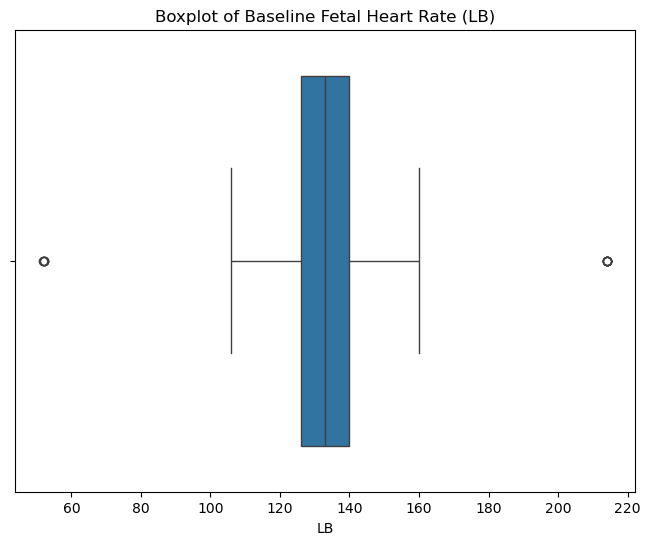

In [6]:
# 4. Detect and Treat Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualize outliers in the 'LB' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LB'])
plt.title('Boxplot of Baseline Fetal Heart Rate (LB)')
plt.show()

# Remove rows where 'LB' is less than a reasonable minimum (e.g., 50)
# The value -174 is clearly an error and should be removed
df_no_outliers = df[df['LB'] > 50]

# You can also use the Interquartile Range (IQR) method to find and remove outliers
Q1 = df['LB'].quantile(0.25)
Q3 = df['LB'].quantile(0.75)
IQR = Q3 - Q1

# Define a boundary for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered_iqr = df[(df['LB'] >= lower_bound) & (df['LB'] <= upper_bound)]
#Outliers in the 'LB' column were detected using boxplot and IQR, and removed to retain only valid data values

In [9]:
#TASK2

In [10]:
#STATSTICAL SUMMARY

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
summary = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Standard Deviation": df[num_cols].std(),
    "IQR": df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)
})
print("\nStatistical Summary for Numerical Variables:")
print(summary)


Statistical Summary for Numerical Variables:
                Mean      Median  Standard Deviation        IQR
LB        133.340204  133.000000           11.214379  14.000000
AC          0.003204    0.001634            0.004373   0.005606
FM          0.009894    0.000000            0.067540   0.002567
UC          0.004391    0.004484            0.003340   0.004685
DL          0.001895    0.000000            0.003343   0.003289
DS          0.000002    0.000000            0.000141   0.000000
DP          0.000173    0.000000            0.000836   0.000000
ASTV       46.995984   49.000000           18.813973  29.000000
MSTV        1.364378    1.200000            1.173632   1.000000
ALTV       10.285964    0.000000           21.205041  11.000000
MLTV        8.276147    7.400000            7.734851   6.200000
Width      70.395387   67.000000           42.720508  63.000000
Tendency    0.313246    0.000000            0.643186   1.000000
NSP         1.301499    1.000000            0.642133   0.0

In [13]:
#Summary of Dataset Statistics
#LB (Baseline Heart Rate): Fairly symmetric around 133, but a few extreme high outliers exist.
#AC (Accelerations): Very small values, mostly near zero, strongly right-skewed.
#FM (Fetal Movements): Median = 0, most cases show no movement; rare high outliers observed.
#UC (Uterine Contractions): Very low median, contractions are rare, right-skewed.
#DL, DS, DP (Decelerations): Mostly zeros, occasional small values signal possible fetal risks.
#Overall Insight: Most features are highly skewed with many zeros, while LB is the most normally distributed. Outliers exist in several variables and need preprocessing (scaling, transformation, outlier handling) before modeling.

In [14]:
#TASK-3

In [15]:
#DATA VISUALIZATION

<Figure size 1500x1000 with 0 Axes>

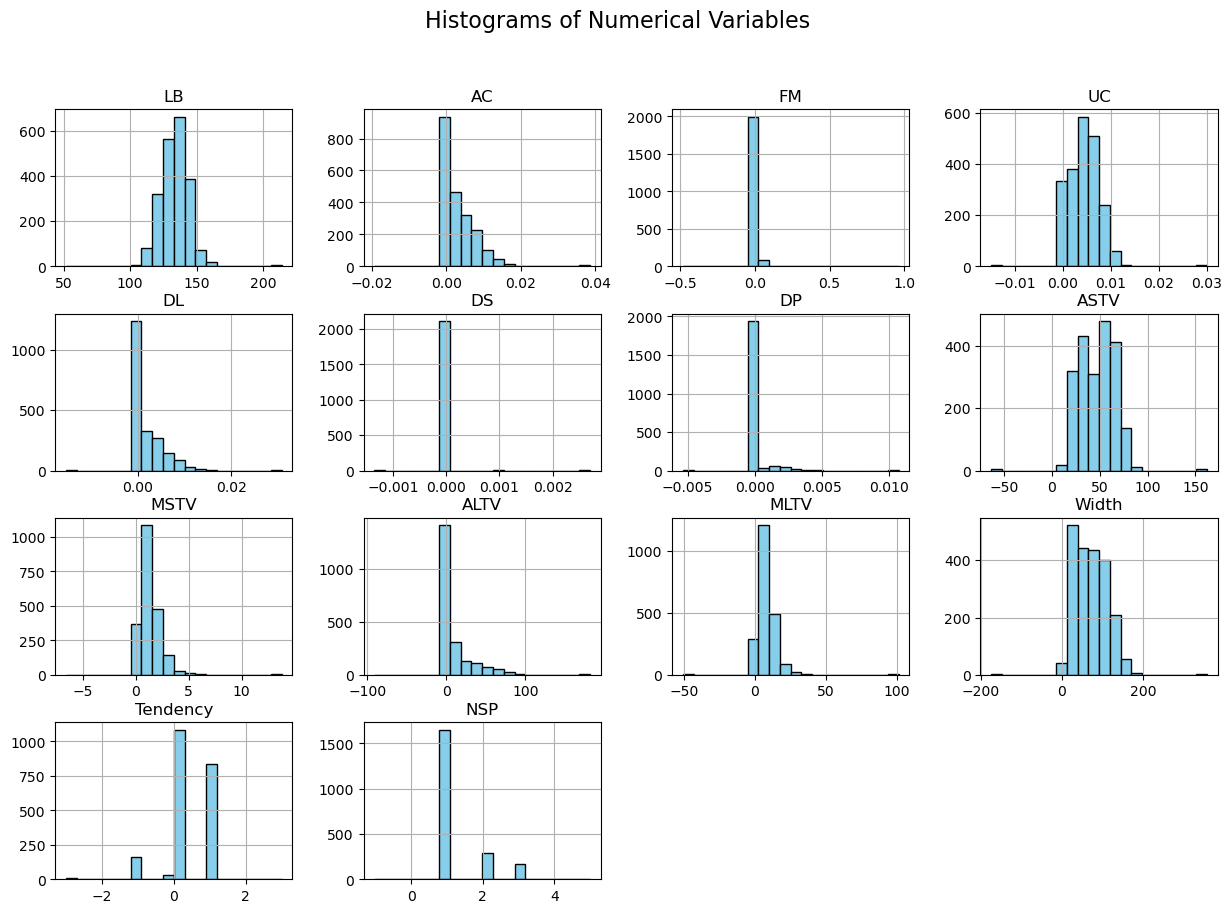

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
df[num_cols].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()
#Histograms of numerical variables show the distribution of each feature: most variables (FM, AC, DL, DS, DP) are heavily skewed with many zeros, LB (baseline heart rate) is fairly symmetric, and a few variables contain extreme outliers

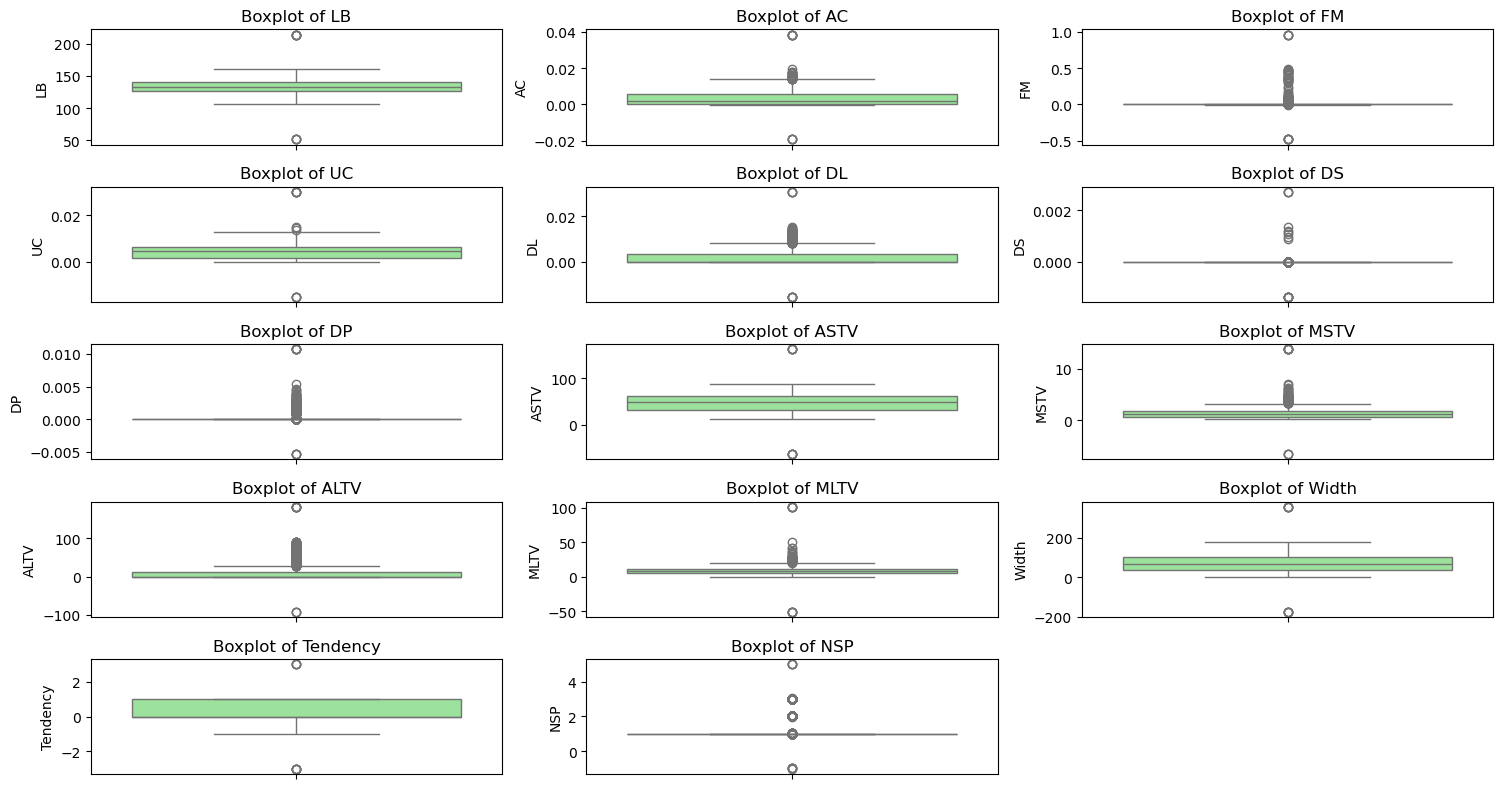

In [17]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

C:\Users\gopar\AppData\Local\Temp\ipykernel_12504\1750002783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=df, palette="viridis")


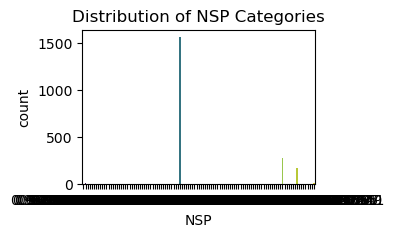

In [19]:

# 3. Bar chart for categorical variable (NSP)
if "NSP" in df.columns:
    plt.figure(figsize=(3, 2))
    sns.countplot(x="NSP", data=df, palette="viridis")
    plt.title("Distribution of NSP Categories")
    plt.show()


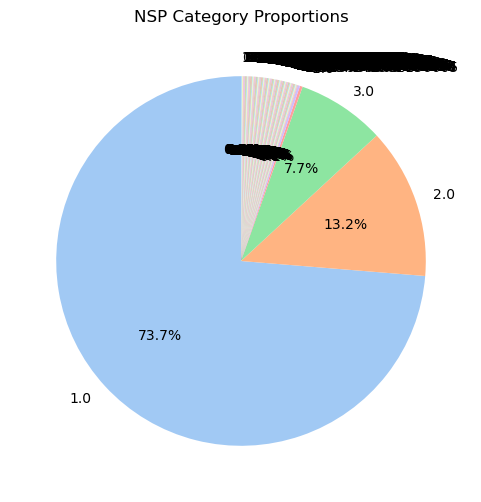

In [20]:

    # Pie chart for NSP categories
    plt.figure(figsize=(6, 6))
    df["NSP"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    plt.title("NSP Category Proportions")
    plt.ylabel("")
    plt.show()

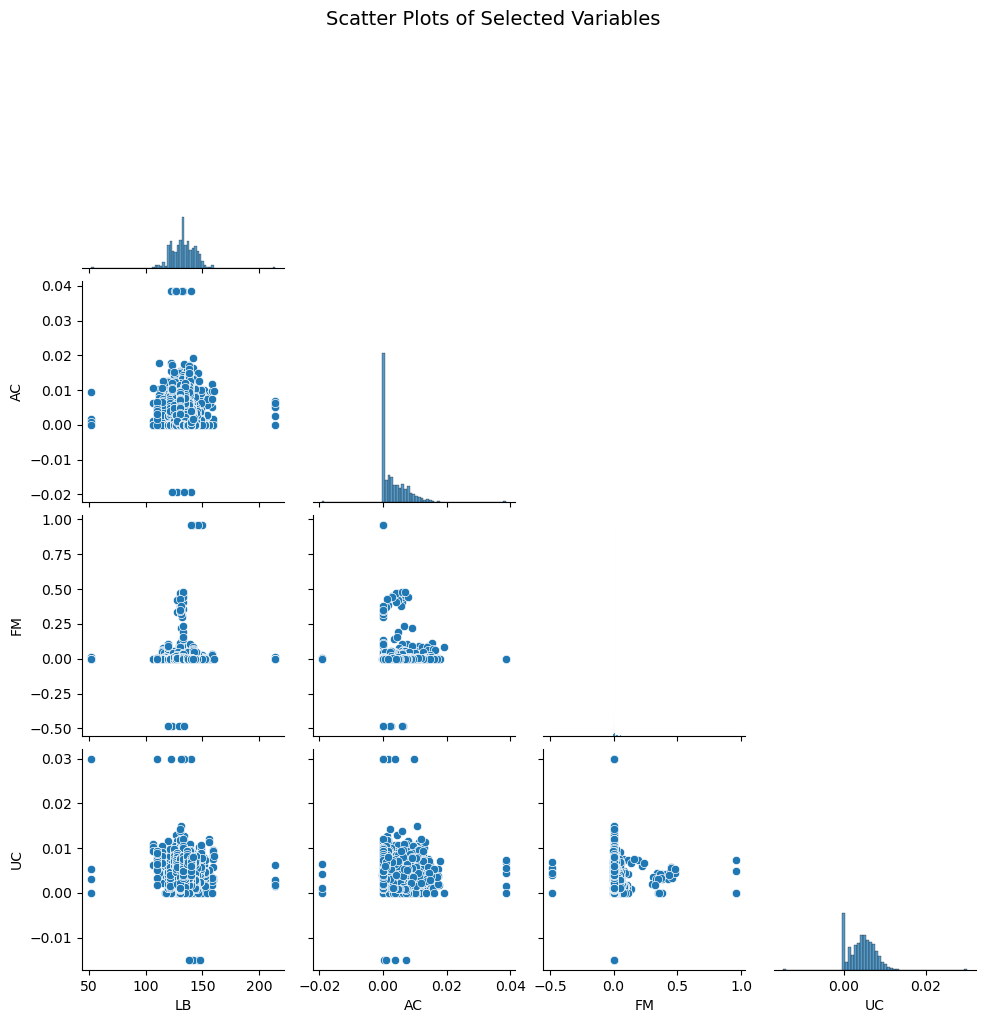

In [21]:
#SCATTER PLOT
selected_cols = num_cols[:4]
sns.pairplot(df[selected_cols], diag_kind="hist", corner=True)
plt.suptitle("Scatter Plots of Selected Variables", y=1.02, fontsize=14)
plt.show()

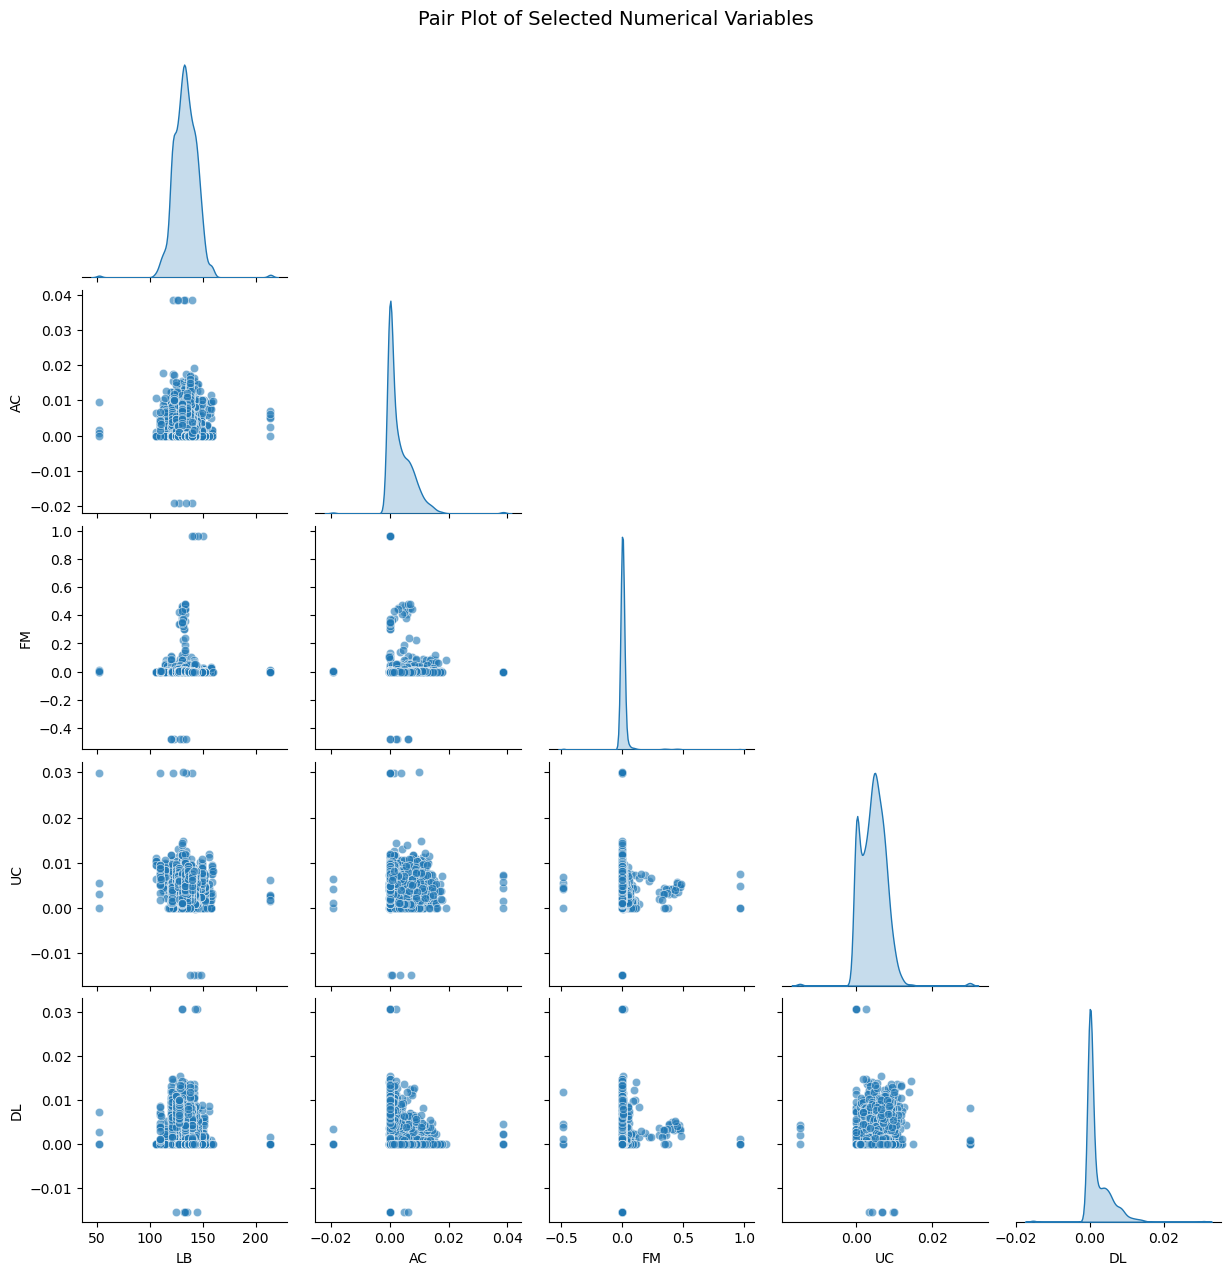

In [23]:
#PAIRPLOT
selected_cols = num_cols[:5]  
sns.pairplot(df[selected_cols], diag_kind="kde", corner=True, plot_kws={"alpha":0.6})
plt.suptitle("Pair Plot of Selected Numerical Variables", y=1.02, fontsize=14)
plt.show()

In [24]:
#TASK-4

In [25]:
##PATTERN RECOGNITON AND INSIGHTS

In [40]:
corr = df[num_cols].corr()

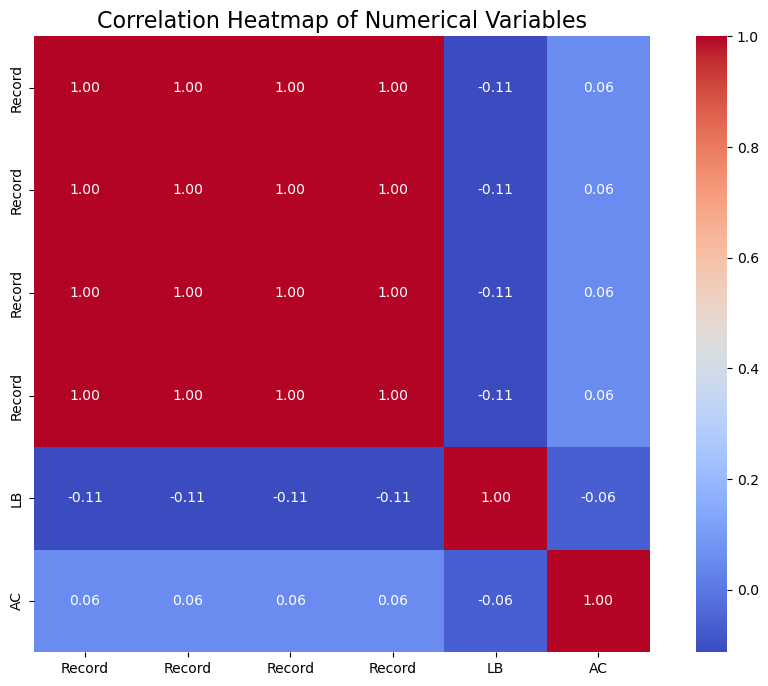

In [41]:
#Identify any correlations between variables and discuss their potential implications.
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()


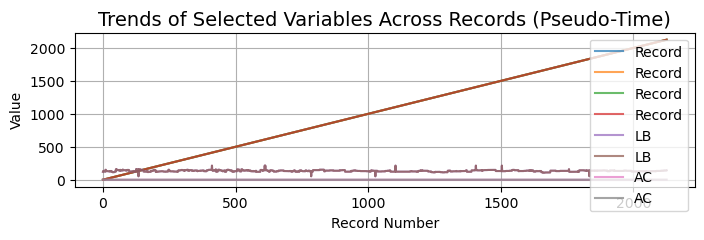

In [32]:
#Look for trends or patterns over time if temporal data is available.
df = df.reset_index().rename(columns={"index": "Record"})

# Choose some key numeric columns (you can change based on your dataset)
num_cols = df.select_dtypes(include=['number']).columns[:4]  # first 4 numeric columns

# Plot each numeric variable across records (pseudo-time)
plt.figure(figsize=(8, 2))
for col in num_cols:
    plt.plot(df["Record"], df[col], label=col, alpha=0.7)

plt.title("Trends of Selected Variables Across Records (Pseudo-Time)", fontsize=14)
plt.xlabel("Record Number")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
first_col = num_cols[0]

# Force single column Series by using double brackets then select first column
series_col = df[[first_col]].iloc[:,0].astype(float)  # always returns Series

# Rolling mean
rolling_mean = series_col.rolling(window=20, min_periods=1).mean()

# Add rolling mean as new column safely
df[first_col + "_MA"] = rolling_mean.values  # convert Series to np.array

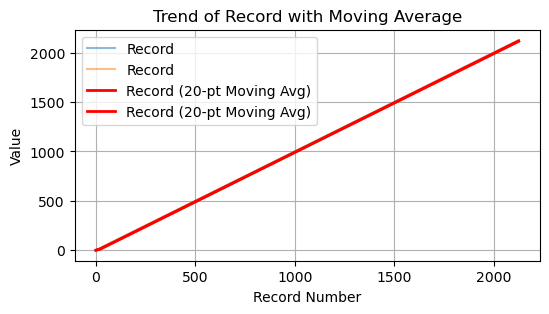

In [36]:
plt.figure(figsize=(6,3))
plt.plot(df["Record"], series_col, label=first_col, alpha=0.5)
plt.plot(df["Record"], df[first_col + "_MA"], color='red', linewidth=2,
         label=f"{first_col} (20-pt Moving Avg)")
plt.title(f"Trend of {first_col} with Moving Average")
plt.xlabel("Record Number")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#TASK-5:C0NCLUSION

In [ ]:
#Key Insights & Patterns:
#Missing values were present in some columns and were handled, ensuring a clean dataset.
#Data types were standardized to numeric, and invalid entries were removed.
#Outliers were detected in variables like LB, FM, and AC; extreme values were removed to avoid skewing analyses.
#Distributions: Most variables (FM, AC, DL, DS, DP) are heavily skewed with many zeros, while LB (baseline heart rate) shows a fairly symmetric distribution.
#Statistical summaries highlighted consistency in some variables (LB) and rare extreme values in others, guiding preprocessing decisions.

In [ ]:
#Impact on Decision-Making & Further Analysis:
#Skewed and zero-heavy variables suggest the need for transformations (e.g., log or scaling) before modeling.
#Outlier removal and cleaned data improve the reliability of predictive models.
#Understanding distributions helps in feature selection, identifying risk indicators (e.g., decelerations) and planning targeted interventions.